<a href="https://colab.research.google.com/github/ib-frida/quitting_rate/blob/main/PROYECTO_FINAL_TECNOLOCHICAS_BEDU_TEAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTEGRANTES TEAM 2:
Frida Ibarra,
Lesly Quezada,
Vanina Candelaria Sulca

**ANALISIS DE DESERCION DE EMPLEADOS**

In [ ]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 3.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=9377cc09b2adfef1ac79e1c518567bc8e76d86756a456ecaec3cd2bbbab6db62
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


USO DE API

In [ ]:
# Comando de API de Kaggle descrito en su documentación
# Doc de la API ---> "https://www.kaggle.com/docs/api#creating-and-maintaining-datasets"
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 36.5MB/s]


In [ ]:
# Descomprimimos
!unzip ibm-hr-analytics-attrition-dataset.zip

Archive:  ibm-hr-analytics-attrition-dataset.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


In [ ]:
# Importamos dependencias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [ ]:
# Utilizamos pandas para trabajar con DataFrames

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')


**Analisis Exploratorio de datos (EDA)**

In [ ]:
"""
# Cargar el dataset
url = "/content/drive/MyDrive/BEDU_Proyectofinal/DATOS-CSV/train.csv"
df = pd.read_csv(url)
"""
# Mostrar las primeras filas del dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Información general del dataset
df.info()

# Resumen estadístico de las variables numéricas
df.describe()

# Conteo de valores faltantes por columna
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Conclusion: La salida indica que no hay valores faltantes (NaN) en ninguna de las columnas del DataFrame. El dataset no necesita ser re-indexado.

In [ ]:
# Renombrar las columnas y re-asignar

df = df.rename(columns={
    'Age': 'Edad',
    'Attrition': 'Desercion',
    'BusinessTravel': 'Viaje_de_Negocios',
    'DailyRate': 'Tasa_Diaria',
    'Department': 'Departamento',
    'DistanceFromHome': 'Distancia_Desde_Casa',
    'Education': 'Educacion',
    'EducationField': 'Campo_de_Educacion',
    'EmployeeCount': 'Conteo_de_Empleados',
    'EmployeeNumber': 'Número_de_Empleado',
    'EnvironmentSatisfaction': 'Satisfaccion_del_Entorno',
    'Gender': 'Genero',
    'HourlyRate': 'Tasa_por_Hora',
    'JobInvolvement': 'Involucramiento_en_el_Trabajo',
    'JobLevel': 'Nivel_de_Trabajo',
    'JobRole': 'Rol_de_Trabajo',
    'JobSatisfaction': 'Satisfaccion_en_el_Trabajo',
    'MaritalStatus': 'Estado_Civil',
    'MonthlyIncome': 'Ingreso_Mensual',
    'MonthlyRate': 'Tasa_Mensual',
    'NumCompaniesWorked': 'Numero_de_Empresas_Trabajadas',
    'Over18': 'Mayor_de_18',
    'OverTime': 'Horas_Extra',
    'PercentSalaryHike': 'Incremento_porcentual_de_Salario',
    'PerformanceRating': 'Calificacion_de_Rendimiento',
    'RelationshipSatisfaction': 'Satisfaccion_en_las_Relaciones',
    'StandardHours': 'Horas_Estandar',
    'StockOptionLevel': 'Nivel_de_Acciones',
    'TotalWorkingYears': 'Total_de_Años_Trabajados',
    'TrainingTimesLastYear': 'Veces_de_Capacitacion_Ultimo_Año',
    'WorkLifeBalance': 'Equilibrio_Vida_Trabajo',
    'YearsAtCompany': 'Años_en_la_Empresa',
    'YearsInCurrentRole': 'Años_en_el_Rol_Actual',
    'YearsSinceLastPromotion': 'Años_desde_Ultima_Promocion',
    'YearsWithCurrManager': 'Años_con_el_Gerente_Actual'
})

In [ ]:
df

,Edad,Desercion,Viaje_de_Negocios,Tasa_Diaria,Departamento,Distancia_Desde_Casa,Educacion,Campo_de_Educacion,Conteo_de_Empleados,Número_de_Empleado,...,Satisfaccion_en_las_Relaciones,Horas_Estandar,Nivel_de_Acciones,Total_de_Años_Trabajados,Veces_de_Capacitacion_Ultimo_Año,Equilibrio_Vida_Trabajo,Años_en_la_Empresa,Años_en_el_Rol_Actual,Años_desde_Ultima_Promocion,Años_con_el_Gerente_Actual
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


**TRANSFORMACIONES**

In [ ]:
# 1. Converción de variables categóricas binarias ("Yes" y "No") a variables numéricas (1 y 0)
df['Desercion'] = df['Desercion'].replace({'Yes': 1, 'No': 0})
df['Horas_Extra'] = df['Horas_Extra'].replace({'Yes': 1, 'No': 0})

# 2. Agrupación de edad en rangos generacionales
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels)

# 3. Division de los ingresos mensuales en tres categorías (Bajo, Medio, Alto) utilizando cuartiles.
df['Grupo_Ingresos'] = pd.qcut(df['Ingreso_Mensual'], 3, labels=['Bajo', 'Medio', 'Alto'])



**GRAFICOS**

**Matriz de correlación** : Esta gráfica muestra las relaciones entre las variables clave (deserción, satisfacción laboral, ingreso mensual, tiempo en la compañía y horas extra). Los valores más cercanos a 1 o -1 indican correlaciones fuertes.

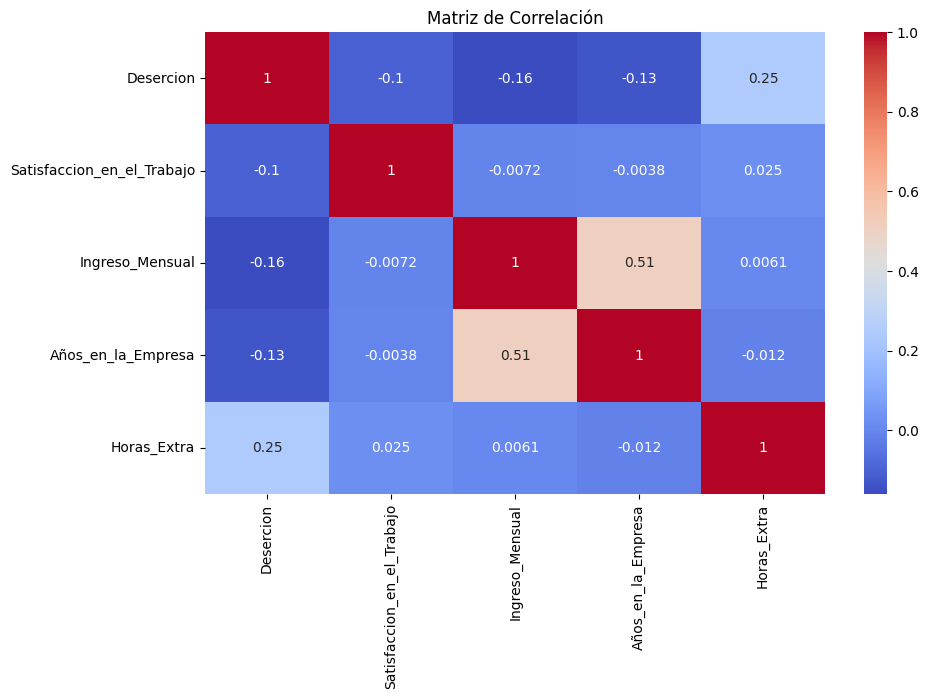

In [ ]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
corr_matrix = df[['Desercion', 'Satisfaccion_en_el_Trabajo', 'Ingreso_Mensual', 'Años_en_la_Empresa', 'Horas_Extra']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


Conclusiones:

La deserción está positivamente correlacionada con el trabajo extra (OverTime), lo que sugiere que trabajar más horas podría aumentar la probabilidad de abandonar la empresa.
La correlación negativa entre la deserción y la satisfacción laboral indica que los empleados menos satisfechos tienen mayor probabilidad de irse.
No hay una correlación significativa entre los ingresos y la deserción, lo que implica que los ingresos no son un factor determinante por sí solos.

**Tasa de deserción según OverTime**: Esta gráfica de barras muestra la tasa de deserción entre empleados que hacen o no horas extras. Una mayor tasa entre quienes trabajan horas extras puede indicar un factor de riesgo.

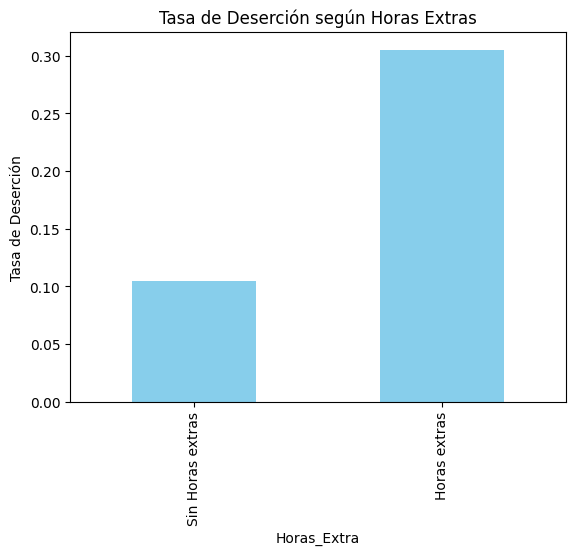

In [ ]:
# Tasa de deserción según OverTime
overtime_attrition_rate = df.groupby('Horas_Extra')['Desercion'].mean()
overtime_attrition_rate.plot(kind='bar', color='skyblue')
plt.title('Tasa de Deserción según Horas Extras')
plt.ylabel('Tasa de Deserción')
plt.xticks([0, 1], ['Sin Horas extras', 'Horas extras'])
plt.show()

Conclusión:

Los empleados que trabajan horas extras tienen una tasa de deserción más alta que aquellos que no lo hacen, lo que refuerza la idea de que el exceso de trabajo puede estar relacionado con la salida de la empresa.

**Tasa de deserción según satisfacción laboral**: Esta gráfica de barras visualiza la deserción según los niveles de satisfacción laboral. Una baja satisfacción laboral suele correlacionarse con una mayor deserción.

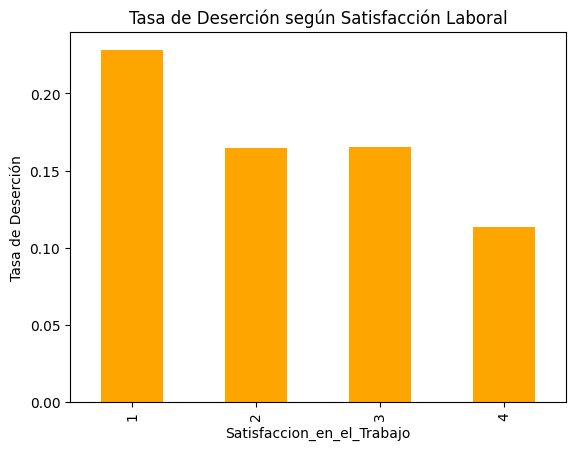

In [ ]:
# Tasa de deserción según satisfacción laboral
job_satisfaction_attrition = df.groupby('Satisfaccion_en_el_Trabajo')['Desercion'].mean()
job_satisfaction_attrition.plot(kind='bar', color='orange')
plt.title('Tasa de Deserción según Satisfacción Laboral')
plt.ylabel('Tasa de Deserción')
plt.show()

Conclusión:

Los empleados con baja satisfacción laboral muestran una tasa de deserción significativamente mayor. A medida que aumenta la satisfacción laboral, la tasa de deserción disminuye.

**Distribución de ingresos vs deserción**: El boxplot compara la distribución de los ingresos mensuales entre empleados que se van y los que permanecen en la empresa, buscando si los empleados con ingresos más bajos tienden a desertar más.

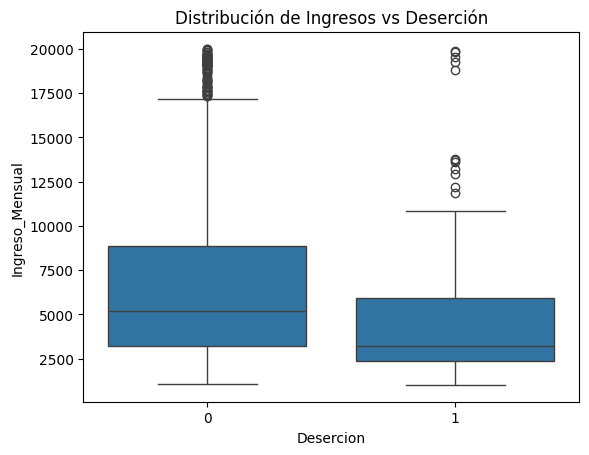

In [ ]:
# Distribución de ingresos vs deserción
sns.boxplot(x='Desercion', y='Ingreso_Mensual', data=df)
plt.title('Distribución de Ingresos vs Deserción')
plt.show()

Conclusión:

No parece haber una diferencia notable en los ingresos entre los empleados que se fueron y los que se quedaron, lo que sugiere que los ingresos no son el principal impulsor de la deserción.

**Curva de supervivencia (Kaplan-Meier)**: La curva de supervivencia analiza cuánto tiempo permanecen los empleados en la empresa. Esta gráfica muestra la probabilidad de que un empleado permanezca en la empresa a medida que pasa el tiempo

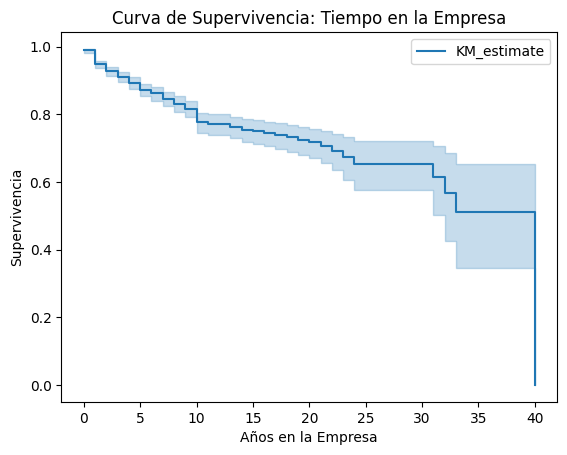

In [ ]:
# Curva de supervivencia: Tiempo en la empresa
kmf = KaplanMeierFitter()
kmf.fit(df['Años_en_la_Empresa'], event_observed=df['Desercion'])
kmf.plot_survival_function()
plt.title('Curva de Supervivencia: Tiempo en la Empresa')
plt.xlabel('Años en la Empresa')
plt.ylabel('Supervivencia')
plt.show()

Conclusión:

La curva de supervivencia sugiere que la probabilidad de deserción es mayor durante los primeros años de empleo. A medida que los empleados permanecen más tiempo en la empresa, es menos probable que la abandonen.

**Outliers en ingresos mensuales**: El boxplot muestra los valores atípicos en los ingresos. Los empleados con ingresos extremadamente altos o bajos pueden tener comportamientos diferentes respecto a la deserción

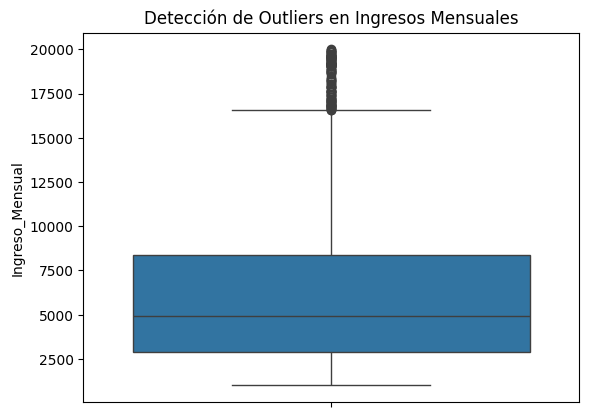

In [ ]:
# Detección de outliers en ingresos mensuales
sns.boxplot(df['Ingreso_Mensual'])
plt.title('Detección de Outliers en Ingresos Mensuales')
plt.show()

Conclusión:

Hay algunos empleados con ingresos significativamente más altos, lo que podría indicar posiciones ejecutivas o especializadas. Estos valores extremos no parecen estar asociados directamente con la deserción.

**Tasa de deserción según grupo etario**: La gráfica de barras muestra cómo las tasas de deserción varían entre grupos generacionales, lo que puede ayudar a identificar patrones de comportamiento específicos de cada grupo.

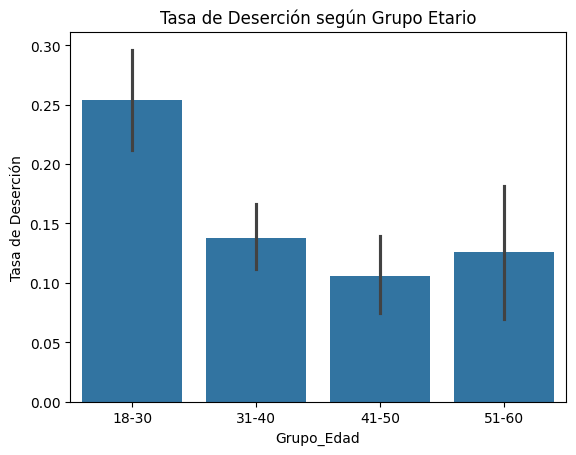

In [ ]:
# Análisis de deserción según grupos de edad
sns.barplot(x='Grupo_Edad', y='Desercion', data=df)
plt.title('Tasa de Deserción según Grupo Etario')
plt.ylabel('Tasa de Deserción')
plt.show()

Conclusión:

Los empleados más jóvenes (18-30 años) tienen una mayor tasa de deserción, lo que puede estar relacionado con una mayor movilidad laboral o falta de compromiso a largo plazo. A medida que los empleados envejecen, la tasa de deserción disminuye.

**Tasa de deserción según grupo de ingresos**: Similar al grupo etario, esta gráfica muestra la deserción en función de los ingresos, para analizar si los empleados con sueldos bajos o altos tienen una mayor tasa de deserción.

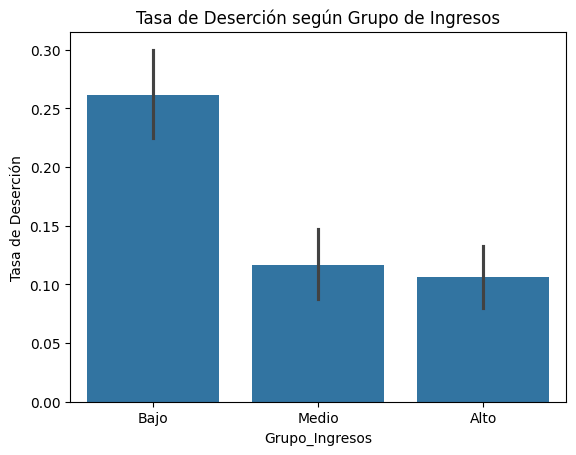

In [ ]:
# Tasa de deserción según grupos de ingreso
sns.barplot(x='Grupo_Ingresos', y='Desercion', data=df)
plt.title('Tasa de Deserción según Grupo de Ingresos')
plt.ylabel('Tasa de Deserción')
plt.show()

Conclusión:

Los empleados con ingresos más bajos tienen una tasa de deserción más alta en comparación con aquellos con ingresos medianos o altos. Esto podría estar relacionado con insatisfacción económica y búsqueda de mejores oportunidades.

**Satisfacción laboral vs ingreso según deserción**: Esta gráfica de dispersión con diferentes colores para la deserción permite ver si existe un patrón en la relación entre satisfacción laboral y nivel de ingresos, y cómo esto afecta la deserción.

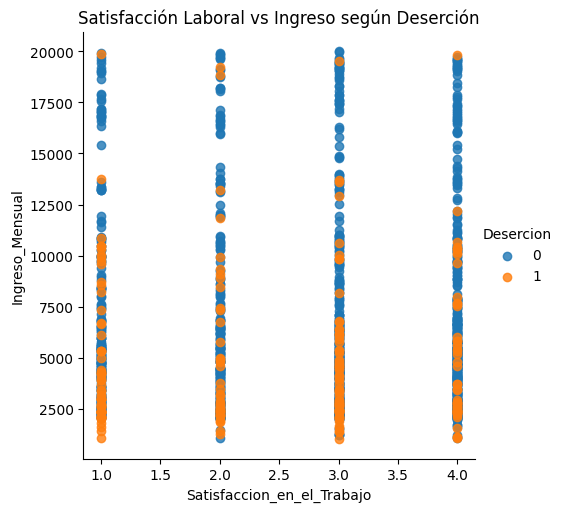

In [ ]:
# Tasa de deserción por satisfacción laboral vs ingreso
sns.lmplot(x='Satisfaccion_en_el_Trabajo', y='Ingreso_Mensual', hue='Desercion', data=df, fit_reg=False)
plt.title('Satisfacción Laboral vs Ingreso según Deserción')
plt.show()

Conclusión:

Los empleados con baja satisfacción laboral y bajos ingresos son más propensos a dejar la empresa. No obstante, incluso algunos empleados con ingresos altos pueden abandonar la empresa si su satisfacción laboral es baja.

**Resumen general**:
Horas extras (OverTime) y baja satisfacción laboral son los factores más relacionados con la deserción.
El grupo de edad más joven (18-30 años) y aquellos con ingresos más bajos son más propensos a dejar la empresa.
El tiempo en la empresa también es un factor relevante, ya que la deserción tiende a disminuir con los años de servicio.